<a href="https://colab.research.google.com/github/AliAkbarBadri/mountain-car-v0/blob/master/mlp1_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!apt-get install python-opengl -y
!apt install xvfb -y
!pip install pyvirtualdisplay
!pip install pyglet

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import matplotlib.animation
from IPython.display import HTML
from IPython.display import display as ipy_disp
import tensorflow as tf
import keras
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gym
import random

In [3]:
def get_screen():
  global display
  try:
    display.stop()
  except:
    pass
  from pyvirtualdisplay import Display
  display = Display(visible=0, size=(1400, 900))
  display.start()

get_screen()

In [4]:
def plot_environment(env, figsize=(5,4)):
    plt.figure(figsize=figsize)
    img = env.render(mode="rgb_array")
    plt.imshow(img)
    plt.axis("off")
    return img

In [5]:
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

# Test

In [6]:
env = gym.make("MountainCar-v0")

loaded_model = keras.models.load_model('original_mlp1.h5')

trials = 100
trial_len = 200
all_rewards_test = []
for trial in range(trials):
    cur_state = env.reset().reshape(1, 2)
    for step in range(trial_len):
        action = np.argmax(loaded_model.predict(cur_state)[0])
        cur_state, reward, done, _ = env.step(action)
        cur_state = cur_state.reshape(1, 2)
        if done:
            env.reset()
            break
    all_rewards_test.append(step+1)
    print("Iteration: {} Score: -{}".format(trial, step+1))
# env.close()

Iteration: 0 Score: -166
Iteration: 1 Score: -94
Iteration: 2 Score: -152
Iteration: 3 Score: -154
Iteration: 4 Score: -148
Iteration: 5 Score: -152
Iteration: 6 Score: -153
Iteration: 7 Score: -159
Iteration: 8 Score: -154
Iteration: 9 Score: -164
Iteration: 10 Score: -86
Iteration: 11 Score: -160
Iteration: 12 Score: -160
Iteration: 13 Score: -171
Iteration: 14 Score: -89
Iteration: 15 Score: -148
Iteration: 16 Score: -158
Iteration: 17 Score: -156
Iteration: 18 Score: -88
Iteration: 19 Score: -153
Iteration: 20 Score: -153
Iteration: 21 Score: -93
Iteration: 22 Score: -158
Iteration: 23 Score: -148
Iteration: 24 Score: -148
Iteration: 25 Score: -154
Iteration: 26 Score: -153
Iteration: 27 Score: -148
Iteration: 28 Score: -88
Iteration: 29 Score: -169
Iteration: 30 Score: -94
Iteration: 31 Score: -95
Iteration: 32 Score: -148
Iteration: 33 Score: -156
Iteration: 34 Score: -89
Iteration: 35 Score: -153
Iteration: 36 Score: -92
Iteration: 37 Score: -149
Iteration: 38 Score: -159
Iterat

In [7]:
first_win = -1
for i,value in enumerate(all_rewards_test):
  if value < 200:
    first_win = i
    break

In [8]:
print("mean reward: ",np.mean(all_rewards_test),", best reward:",np.min(all_rewards_test),", first win episode:",first_win)

mean reward:  138.55 , best reward: 85 , first win episode: 0


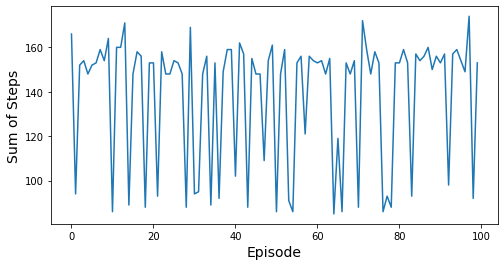

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(all_rewards_test)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of Steps", fontsize=14)
plt.show()

# Video

In [11]:
frames = []

state = env.reset()
done = False
step = 0
while not done:
    img = env.render(mode="rgb_array")
    frames.append(img)
    step +=1
    state = np.reshape(state, [1,2])
    action = loaded_model.predict(state)
    action = np.argmax(action)
    next_state, reward, done, info = env.step(action)
    state = next_state

env.close()

In [12]:
plot_animation(frames)